In [1]:
from gpflow.models import GPR
from gpflow.kernels import RBF, LLS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from gpflow.training.scipy_optimizer import ScipyOptimizer
import logging
logging.disable()


The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


In [2]:
scaler = StandardScaler()
train_X1 = np.concatenate([np.linspace(0.25,0.51,10), np.linspace(0.49,0.75,10)]).reshape(-1,1)
train_X2 = np.concatenate([np.linspace(0.49,0.75,10), np.linspace(0.25,0.51,10)]).reshape(-1,1)
train_X = np.concatenate([train_X1, train_X2], axis=1)
train_XX = scaler.fit_transform(train_X)
test_X = np.hstack([np.linspace(0,1,120).reshape(-1,1), np.linspace(0,1,120).reshape(-1,1)])
test_XX = scaler.transform(test_X)
train_y = np.concatenate([np.ones((10, 1)), np.ones((10, 1))*2])
print(train_XX.shape, train_y.shape, test_XX.shape)

(20, 2) (20, 1) (120, 2)


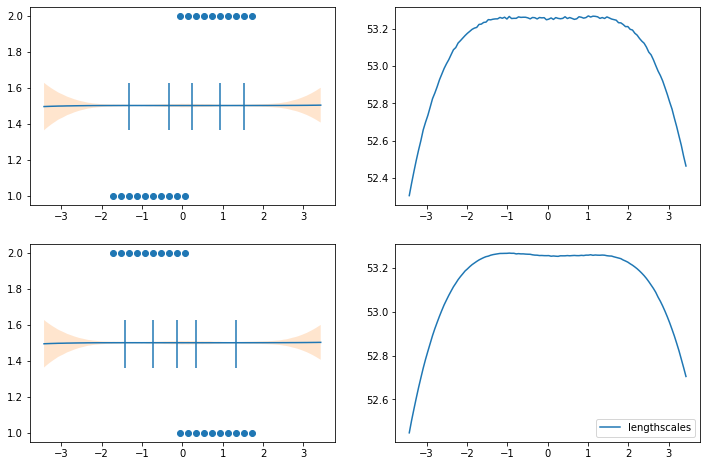

In [13]:
with tf.Session() as t:
    model = GPR(train_XX, train_y, LLS(2,train_XX,5, active_dims=[0, 1]))
    opt = ScipyOptimizer()
    fig, ax = plt.subplots(2,2, figsize=(12,8))
    opt.minimize(model)
    pred_y, cov_diag = model.predict_y(test_XX)
    std2 = (cov_diag**0.5*2).squeeze() # 2 standrard deviations
    lls = []
    lls.append(model.kern.predict_lengthscales(test_XX, 0).eval())
    lls.append(model.kern.predict_lengthscales(test_XX, 1).eval())
    for i in range(2):
        ax[i,0].scatter(train_XX[:,i], train_y)
        ax[i,0].plot(test_XX[:,i], pred_y)
        ax[i,0].fill_between(test_XX[:,i].squeeze(), pred_y.squeeze()-std2, pred_y.squeeze()+std2, alpha=0.2)
        ax[i,0].vlines(model.kern.X_bar[:,i], min(pred_y.squeeze()-std2), max(pred_y.squeeze()+std2))
        ax[i,1].plot(test_XX[:,i], lls[i], label='lengthscales')
    plt.legend();

## appendix

In [ ]:
a = np.array([[1,2,3,4]])
b = a.T
a.shape, b.shape
b-a

In [ ]:
tns = tf.reshape(tf.convert_to_tensor([[1,2],[3,4]]), (2,2))

In [ ]:
a = tf.diag_part(tns)
with tf.Session() as t:
    print(a.eval())

In [ ]:
class A:
    def __init__(self):
        b=B()
        print("I am A")

class B:
    def __init__(self):
        print("I am B")
b = A()

In [ ]:
tf.exp()

## Testing

In [ ]:
from gpfl